In [21]:
import vbdiar


Help on package vbdiar:

NAME
    vbdiar

PACKAGE CONTENTS
    vb

FILE
    /anaconda3/envs/dlenv/lib/python3.6/site-packages/vbdiar/__init__.py




# OpenSMILE

### C configure I input O output

SMILExtract -C config/demo/demo1_energy.conf -I wav_samples/speech01.wav -O speech01.energy.csv

In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



In [33]:
# # 提取
# f=open('/Users/shane/Downloads/opensmile-2.3.0/dutch_vowels.txt','r')
# # 去最后一行
# last_line=f.readlines()[-1]
# f.close()
# features=last_line.split(',')
# # 去掉第一个和最后一个元素
# # 得到features
# features=features[1:-1]


In [1]:
# 批量提取
patients_audio_path='/Users/shane/Downloads/Hyperfun_dys/Patients'
healthy_audio_path='/Users/shane/Downloads/Hyperfun_dys/Healthy'

patients_output_path='/Users/shane/Downloads/Hyperfun_dys/out/Patients'
healthy_output_path='/Users/shane/Downloads/Hyperfun_dys/out/Healthy'

patients_audio_list=os.listdir(patients_audio_path)
healthy_audio_list=os.listdir(healthy_audio_path)


In [6]:
for audio in patients_audio_list:
    if audio[-4:]=='.wav':
        this_path_input=os.path.join(patients_audio_path,audio)
        this_path_output=os.path.join(patients_output_path,audio[:-4]+'.txt')
        cmd='cd /Users/shane/Downloads/opensmile-2.3.0 && SMILExtract -C config/IS09_emotion.conf -I '+this_path_input+' -O '+this_path_output
    os.system(cmd)

In [7]:
for audio in healthy_audio_list:
    if audio[-4:]=='.wav':
        this_path_input=os.path.join(healthy_audio_path,audio)
        this_path_output=os.path.join(healthy_output_path,audio[:-4]+'.txt')
        cmd='cd /Users/shane/Downloads/opensmile-2.3.0 && SMILExtract -C config/IS09_emotion.conf -I '+this_path_input+' -O '+this_path_output
    os.system(cmd)

In [9]:
patients_feature_list=os.listdir(patients_output_path)
healthy_feature_list=os.listdir(healthy_output_path)
patients_feature_list


['819-iau.txt',
 '1888-iau.txt',
 '2463-iau.txt',
 '692-iau.txt',
 '854-iau.txt',
 '1118-iau.txt',
 '1891-iau.txt',
 '363-iau.txt',
 '1816-iau.txt',
 '934-iau.txt',
 '1669-iau.txt',
 '1222-iau.txt',
 '1204-iau.txt',
 '1993-iau.txt',
 '1745-iau.txt',
 '1660-iau.txt',
 '827-iau.txt',
 '1282-iau.txt',
 '1196-iau.txt',
 '1602-iau.txt',
 '1299-iau.txt',
 '1431-iau.txt',
 '1822-iau.txt',
 '1280-iau.txt',
 '1113-iau.txt',
 '2363-iau.txt',
 '1442-iau.txt',
 '1929-iau.txt',
 '1044-iau.txt',
 '1794-iau.txt',
 '2425-iau.txt',
 '2572-iau.txt',
 '1608-iau.txt',
 '1406-iau.txt',
 '2604-iau.txt',
 '881-iau.txt',
 '1471-iau.txt',
 '1800-iau.txt',
 '1189-iau.txt',
 '2420-iau.txt',
 '1327-iau.txt',
 '1562-iau.txt',
 '1051-iau.txt',
 '898-iau.txt',
 '1284-iau.txt',
 '1294-iau.txt',
 '1468-iau.txt',
 '1682-iau.txt',
 '1753-iau.txt',
 '1050-iau.txt',
 '1648-iau.txt',
 '1887-iau.txt',
 '1310-iau.txt',
 '144-iau.txt',
 '669-iau.txt',
 '1607-iau.txt',
 '2589-iau.txt',
 '1379-iau.txt',
 '1394-iau.txt',
 '1861-

In [55]:
patient_features=[]
i=0
for path in patients_feature_list:
    if path[-4:]=='.txt':
        f=open(patients_output_path+'/'+path,'r')
        last_line=f.readlines()[-1]
        f.close()
        features=last_line.split(',')
        features=features[1:-1]
        patient_features.append(features)
        i+=1
patient_features=np.reshape(patient_features, [i, len(features)])
patient_labels=np.zeros([i, 1])
patient=np.column_stack([patient_features, patient_labels])


In [56]:
healthy_features=[]
i=0
for path in healthy_feature_list:
    if path[-4:]=='.txt':
        f=open(healthy_output_path+'/'+path,'r')
        last_line=f.readlines()[-1]
        f.close()
        features=last_line.split(',')
        features=features[1:-1]
        healthy_features.append(features)
        i+=1
healthy_features=np.reshape(healthy_features, [i, len(features)])
healthy_labels=np.ones([i, 1])
healthy=np.column_stack([healthy_features, healthy_labels])

In [61]:
all_data=np.row_stack([patient, healthy])
print(patient_features.shape, healthy_features.shape, patient.shape, healthy.shape, all_data.shape)

(70, 384) (56, 384) (70, 385) (56, 385) (126, 385)


In [70]:
X_train, X_test, y_train, y_test=train_test_split(all_data[:,:-1], all_data[:,-1],
                                                  test_size=0.2, random_state=2019, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(100, 384) (26, 384) (100,) (26,)


In [128]:
clf = SVC(C=1,gamma='scale', kernel='poly', degree=5)
clf.fit(X_train, y_train)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [129]:
pred=clf.predict(X_test)
# row: true; col: pred (true, pred)
confusion_matrix(y_test, pred)

array([[10,  4],
       [ 8,  4]])

In [123]:
clf.score(X_test, y_test)

0.5

# Autism

In [2]:
import speech_recognition as sr

In [3]:
r = sr.Recognizer()
sss=sr.AudioFile('../Audio_recog/test.wav')
with sss as source:
    sss_duration=sss.DURATION # get the time length of the audios
    
    audio_host_1=r.record(source, duration=6)
    audio_guest_1=r.record(source, duration=14)
    audio_host_2=r.record(source, duration=19)
    audio_guest_2=r.record(source, duration=23)
    audio_host_3=r.record(source, duration=17)
test_host_1=r.recognize_google(audio_host_1)
test_host_2=r.recognize_google(audio_host_2)
test_host_3=r.recognize_google(audio_host_3)

test_guest_1=r.recognize_google(audio_guest_1)
test_guest_2=r.recognize_google(audio_guest_2)

# r.recognize_google(audio, language='fr-FR')


In [4]:
print(sss_duration)
print(test_host_1,test_guest_1, test_host_2,test_guest_2, test_host_3)
print('\n',test_guest_1)
print('\n',test_guest_2)

79.50512471655328
this is scientific American's sixty-second science Einstein celebration songs across the world is the key to a better world in the future climate change social inequality Jeremy Farrar director of the wellcome trust one of the world's biggest non-governmental funders of scientific research earlier today January 23rd he spoke to Scientific American editor and chief Maria dichristina at the world economic Forum in Davos after they both took part in the Global Science Outlook discussion at the four and nobody know myself no air organization welcome no organization is going to solve this on the road and so we've launched a campaign cool together signs can bring together people from around the world to say to stand up for those things you can see video of the entire discussion that took place at Davos earlier today just Google World economic Forum in Davos Global Science outlook for scientific American's sixty-second science I'm Steve mirsky

 celebration songs across the 

### Use micphone input

In [49]:
# !pip install pyaudio
# !brew install portaudio
# !python -m speech_recognition
r = sr.Recognizer()
mic = sr.Microphone()
with mic as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)
try:
    print("Google Speech Recognition thinks you said " + r.recognize_google(audio))
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))

Google Speech Recognition thinks you said hello


## Adult word count (AWC)

In [65]:
# import nltk
# nltk.download()

In [54]:
# Normal people say 1000 words more than ASD patients
from nltk.corpus import words
from nltk.tokenize import word_tokenize
word_count=[]
word_list = words.words()
for w in word_tokenize(test_guest_2):
    word_count.append(w in word_list)
    
print(sum(word_count))


40


## Frequency of vocalizations

In [75]:
# total_words=len(test_host_1.split())+len(test_guest_1.split())+len(test_host_2.split())+len(test_guest_2.split())+len(test_host_3.split())
# print('total words: ', total_words)
# frequency_vocal=total_words/sss_duration
# frequency_vocal # words/s

1.9493670886075949

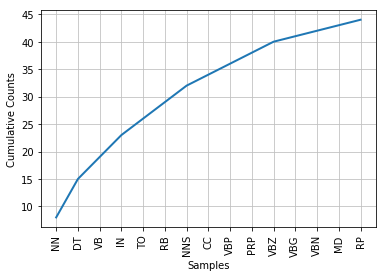

In [93]:
from collections import Counter
word_counter = Counter()
text_test_guest_2=word_tokenize(test_guest_2)
for w in text_test_guest_2:
    word_counter.update(w.split())
# print(word_counter)

ori_tagged=nltk.pos_tag(text_test_guest_2)

tag_fd = nltk.FreqDist(tag for (word, tag) in ori_tagged)
tag_fd.plot(cumulative=True)

## Conversational turns

In [98]:
import tarfile
tar = tarfile.open('/Users/shane/Downloads/VBDiarization/models/x-vectors/0003_sre16_v2_1a.tar.gz', 'r:gz')
tar.extractall('/Users/shane/Downloads/VBDiarization/models/x-vectors')
tar.close()

In [41]:
import sidekit

In [45]:
idmap = sidekit.IdMap()
idmap.leftids = np.array(["host", "guest", "host", "guest", "host"])
idmap.rightids = np.array(["segment_1", "segment_2", "segment_3", "segment_4", "segment_5"])
idmap.start = np.empty((5), dtype="|O")
idmap.stop = np.empty((5), dtype="|O")

idmap.validate()

True

In [47]:
ndx = sidekit.Ndx()
ndx.modelset = np.array(["host", "guest"])
ndx.segset = np.array(["segment_1", "segment_2", "segment_3", "segment_4", "segment_5"])
ndx.trialmask = np.ones((2,5), dtype='bool')

ndx.validate()

True

In [49]:
key = sidekit.Key()
key.modelset = ndx.modelset
key.segset = ndx.segset
key.tar = np.zeros((2,5), dtype='bool')
key.tar[0, 0] = True
key.tar[0, 2] = True
key.tar[0, 4] = True
key.tar[1, 1] = True
key.tar[1, 3] = True

key.non = np.zeros((2,5), dtype='bool')
key.tar[0, 1] = True
key.tar[0, 3] = True
key.non[1, 0] = True
key.tar[1, 2] = True
key.tar[1, 4] = True

key.validate()

True

In [53]:
extractor = sidekit.FeaturesExtractor(audio_filename_structure=None,
                                      feature_filename_structure=None,
                                      sampling_frequency=None,
                                      lower_frequency=200,
                                      higher_frequency=3800,
                                      filter_bank="log",
                                      filter_bank_size=24,
                                      window_size=0.025,
                                      shift=0.01,
                                      ceps_number=20,
                                      vad="snr",
                                      snr=40,
                                      pre_emphasis=0.97,
                                      save_param=["vad", "energy", "cep", "fb"],
                                      keep_all_features=True)
extractor.save(show="test",
               channel=0,
               input_audio_filename='/Users/shane/Downloads/Audio_recog/test.wav',
               output_feature_filename='/Users/shane/Downloads/Audio_recog/test.h5')

[[-7.322996   -0.8414533  -1.2970357  -0.62701106 -0.6092133 ]
 [-6.772664   -1.0545946  -1.2161614   0.8550212   1.1802043 ]
 [-9.7936325  -1.4801264  -0.95820415 -1.136696    0.6637646 ]
 [-7.2524276  -0.9577496  -3.3306034  -1.9414728  -0.514241  ]
 [-6.023513   -1.2433183  -1.077223   -0.35707796  0.05677592]]
[[-7.322996   -0.8414533  -1.2970357  -0.62701106 -0.6092133 ]
 [-6.772664   -1.0545946  -1.2161614   0.8550212   1.1802043 ]
 [-9.7936325  -1.4801264  -0.95820415 -1.136696    0.6637646 ]
 [-7.2524276  -0.9577496  -3.3306034  -1.9414728  -0.514241  ]
 [-6.023513   -1.2433183  -1.077223   -0.35707796  0.05677592]]
dans add_show_per_centil, cep = [[-7.322996   -0.8414533  -1.2970357  -0.62701106 -0.6092133 ]
 [-6.772664   -1.0545946  -1.2161614   0.8550212   1.1802043 ]
 [-9.7936325  -1.4801264  -0.95820415 -1.136696    0.6637646 ]
 [-7.2524276  -0.9577496  -3.3306034  -1.9414728  -0.514241  ]
 [-6.023513   -1.2433183  -1.077223   -0.35707796  0.05677592]]
dataset_id = test/ce

In [59]:
server = sidekit.FeaturesServer(features_extractor=None,
                                feature_filename_structure='/Users/shane/Downloads/Audio_recog/test.h5',
                                sources=None,
                                dataset_list=["energy", "cep", "vad"],
                                mask="[0-12]",
                                feat_norm="cmvn",
                                global_cmvn=None,
                                dct_pca=False,
                                dct_pca_config=None,
                                sdc=False,
                                sdc_config=None,
                                delta=True,
                                double_delta=True,
                                delta_filter=None,
                                context=None,
                                traps_dct_nb=None,
                                rasta=True,
                                keep_all_features=True)
server

	 show: empty 

	 input_feature_filename: empty 

	 feature_filename_structure: /Users/shane/Downloads/Audio_recog/test.h5 
	  
	  

	 Post processing options: 
		 mask: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  
		 feat_norm: cmvn 
		 dct_pca: False, dct_pca_config: (12, 12, None) 
		 sdc: False, sdc_config: (1, 3, 7) 
		 delta: True, double_delta: True, delta_filter: [ 0.25  0.5   0.25  0.   -0.25 -0.5  -0.25] 
		 rasta: True 
		 keep_all_features: True 

	 show: empty 

	 input_feature_filename: empty 

	 feature_filename_structure: /Users/shane/Downloads/Audio_recog/test.h5 
	  
	  

	 Post processing options: 
		 mask: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  
		 feat_norm: cmvn 
		 dct_pca: False, dct_pca_config: (12, 12, None) 
		 sdc: False, sdc_config: (1, 3, 7) 
		 delta: True, double_delta: True, delta_filter: [ 0.25  0.5   0.25  0.   -0.25 -0.5  -0.25] 
		 rasta: True 
		 keep_all_features: True 

In [ ]:
distrib_nb = 2048 # number of Gaussian distributions for each GMM
rank_TV = 400 # Rank of the total variability matrix
tv_iteration = 10 # number of iterations to run
plda_rk = 400 # rank of the PLDA eigenvoice matrix
feature_dir = '/lium/spk1/larcher/mfcc_24/' # directory where to find the features
feature_extension = 'h5' # Extension of the feature files
nbThread = 10 # Number of parallel process to run